#### 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Print variable shapes
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


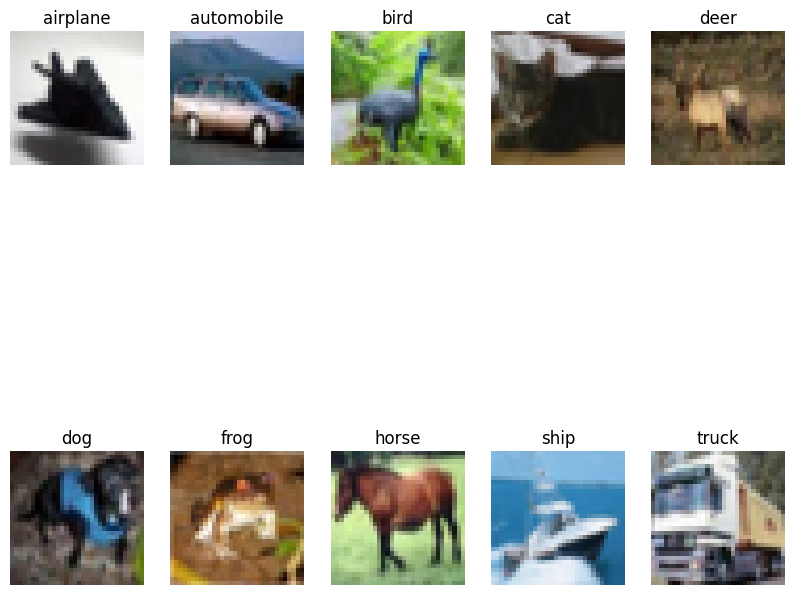

In [4]:
# Print sample images from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(10):
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[class_indices[0]], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [1]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



NameError: name 'models' is not defined

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5361 - accuracy: 0.4422 - val_loss: 1.2905 - val_accuracy: 0.5284
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1701 - accuracy: 0.5842 - val_loss: 1.0799 - val_accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0277 - accuracy: 0.6414 - val_loss: 1.0004 - val_accuracy: 0.6461
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9399 - accuracy: 0.6713 - val_loss: 0.9638 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8638 - accuracy: 0.6966 - val_loss: 0.9370 - val_accuracy: 0.6743
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8058 - accuracy: 0.7175 - val_loss: 0.9676 - val_accuracy: 0.6640
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7615 - accuracy: 0.7356 - val_loss: 0.9357 -

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 - 3s - loss: 0.9199 - accuracy: 0.6912 - 3s/epoch - 10ms/step
Test accuracy: 69.12%


313/313 [==============================] - 4s 12ms/step


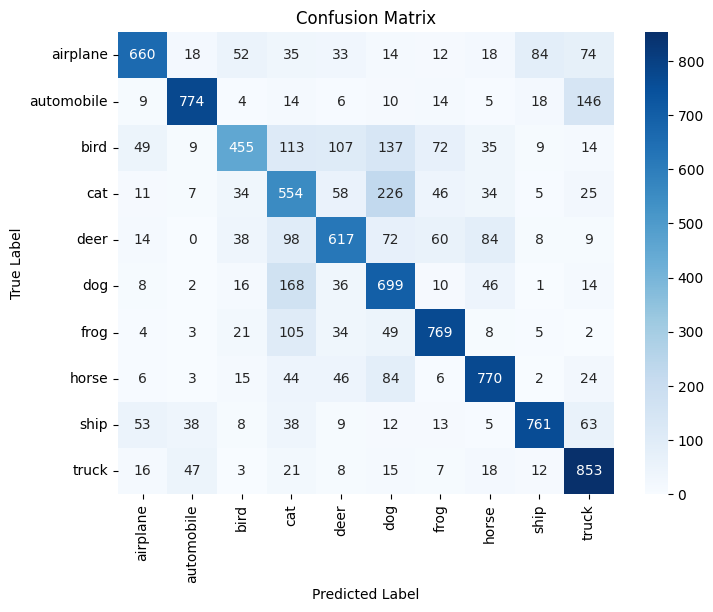

In [9]:
##################################################33print confusion matrix and ROC curve

from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# ROC Curves
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

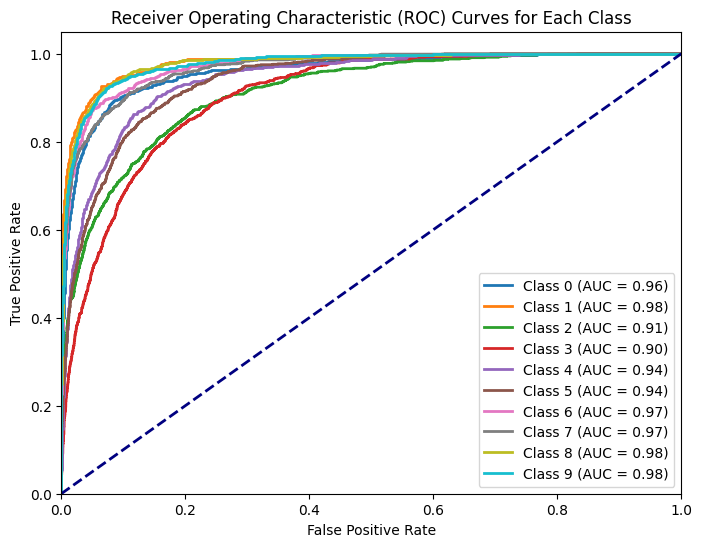

In [11]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

In [12]:
###########################################################################printing performance metrics
# Classification Report
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.80      0.66      0.72      1000
  automobile       0.86      0.77      0.81      1000
        bird       0.70      0.46      0.55      1000
         cat       0.47      0.55      0.51      1000
        deer       0.65      0.62      0.63      1000
         dog       0.53      0.70      0.60      1000
        frog       0.76      0.77      0.77      1000
       horse       0.75      0.77      0.76      1000
        ship       0.84      0.76      0.80      1000
       truck       0.70      0.85      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

